# 💉​💊​ Prédiction du Risque de Diabète par Analyse Clinique et Modèles d'Apprentissage Automatique


## Les critères cliniques tels que : 
- glycémie (Glucose)
- la pression artérielle (Blood Pressure)
- l’épaisseur du pli cutané (Skin Thickness)
- l’insuline (Insulin)
- l’Indice de Masse Corporelle (BMI)
- la fonction de prédisposition génétique au diabète (Diabetes Pedigree Function) 
- l’âge (Age).

## ​✅​ Objective
* Entraîner et déployer un modèle d’intelligence artificielle capable de classer les patients selon leur risque de diabète 
* Regrouper (clustering) les données brutes afin d’identifier des profils ou comportements similaires au sein de la population étudiée.



# 📚​ Bibliothèques

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#  1️⃣ Etape 1: Chargement des données

In [139]:
# Importer les données à l’aide de pandas. Vérifier le type et la structure des colonnes (df.info() et df.head()).
df = pd.read_csv('dataset.csv')
#Affichage de 5 premier ligne
df.head()


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


In [140]:
#Analyser les types de colonnes et dimensions 
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [141]:
# le nombre de collonne et des ligne 
print(f'la data contiene {df.shape[1]} Collone et {df.shape[0]} ligne')

la data contiene 9 Collone et 768 ligne


## ⭐Conclusion :
Ce dataset contient 768 entrées complètes (sans valeurs manquantes) avec des types numériques (int et float), idéales pour l'analyse et la modélisation.

In [142]:

# identifier les doublons .
doublons = df.duplicated().sum()

# la suupression des doublons
df.drop_duplicates()
df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63
764,764,2,122,70,27,0,36.8,0.340,27
765,765,5,121,72,23,112,26.2,0.245,30
766,766,1,126,60,0,0,30.1,0.349,47


## les graph : Histogrammes, boxplots ,pairplots

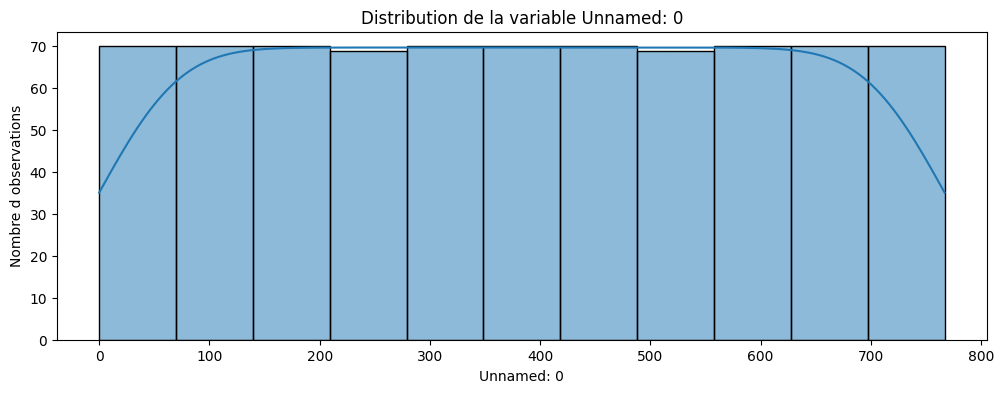

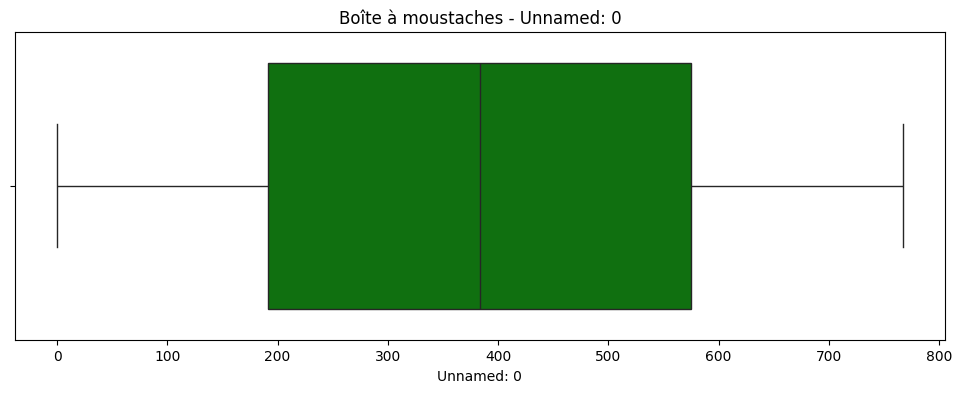

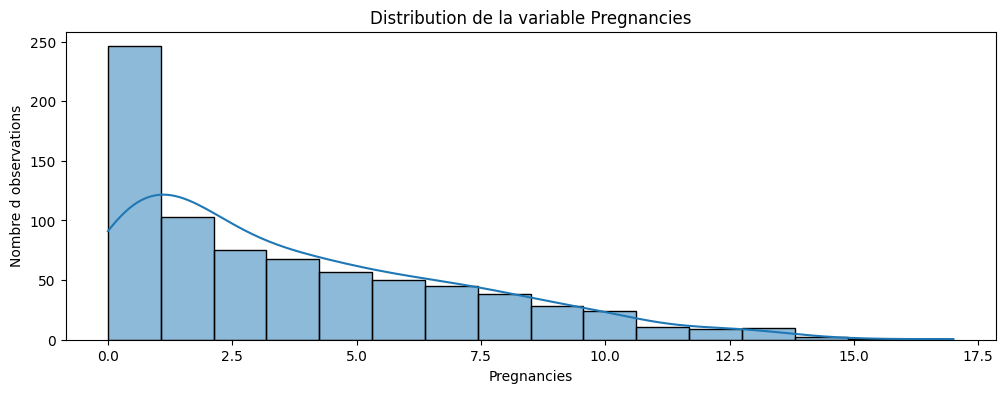

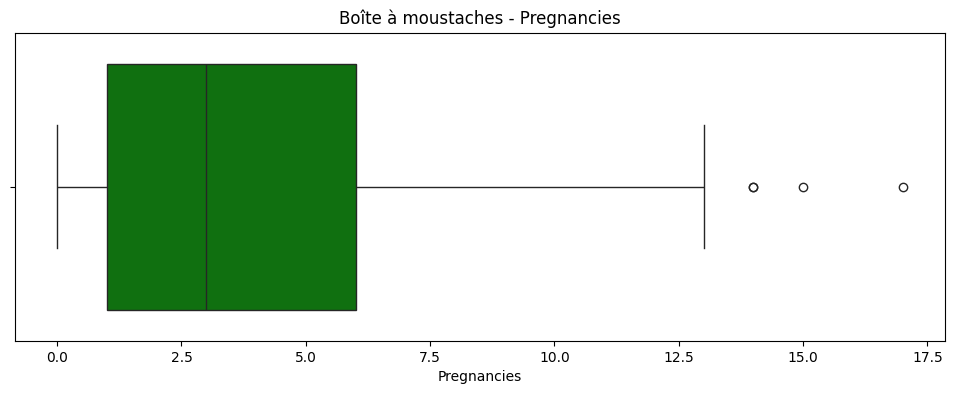

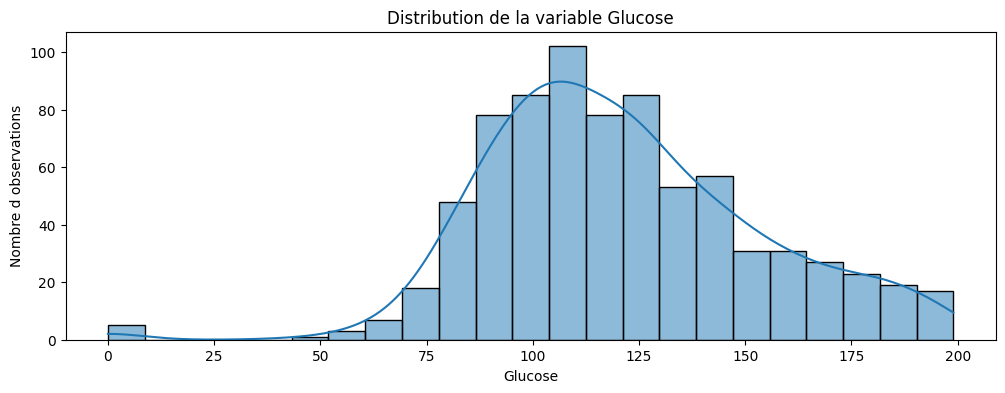

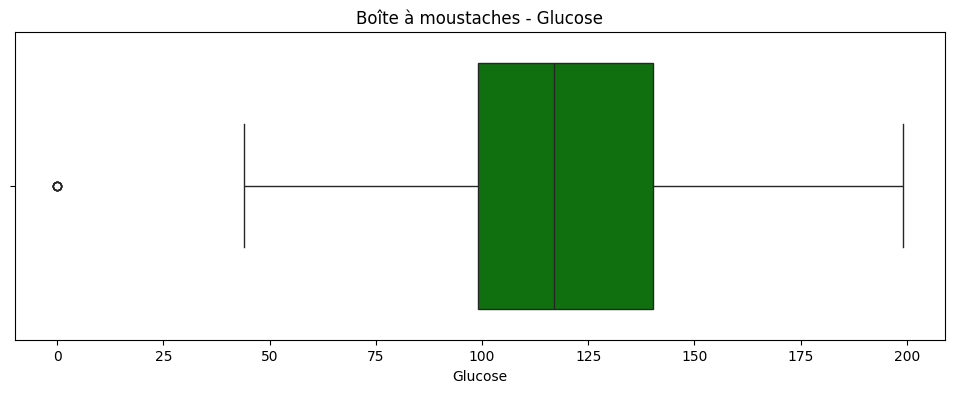

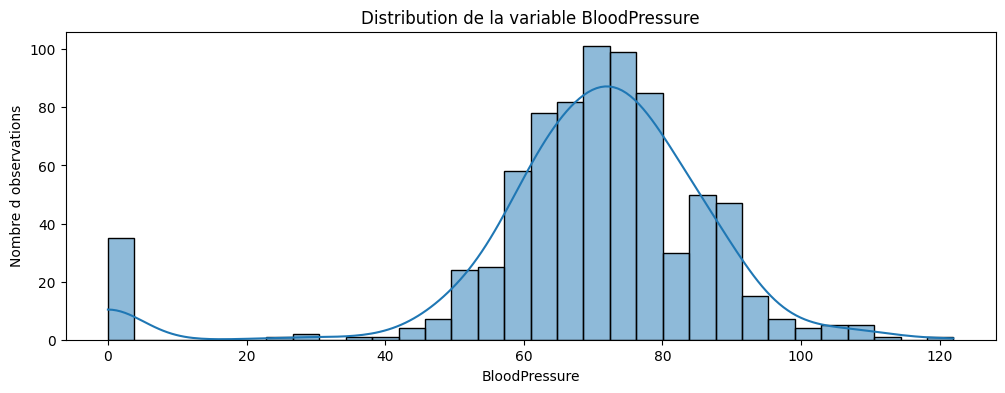

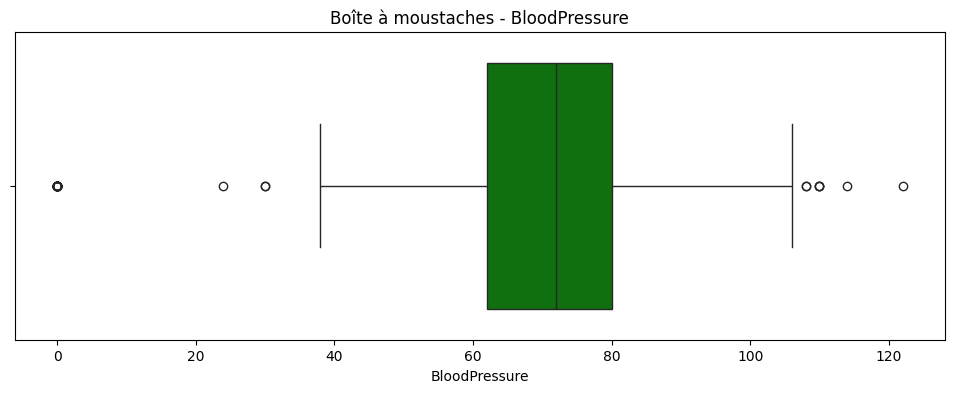

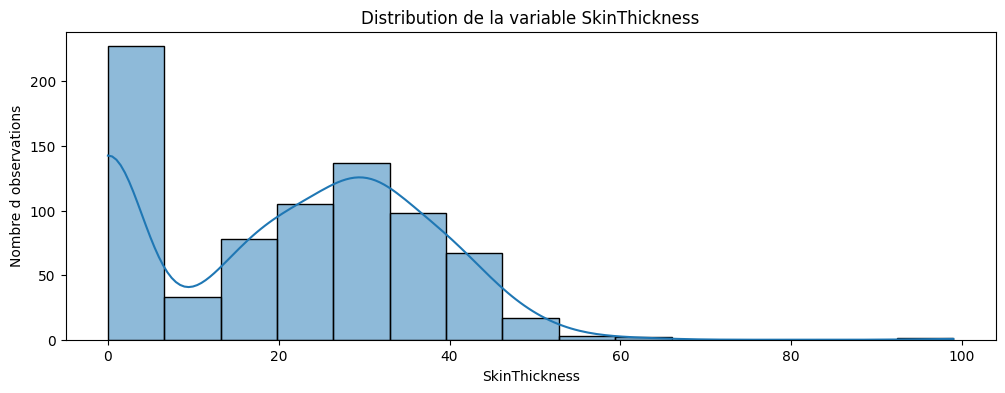

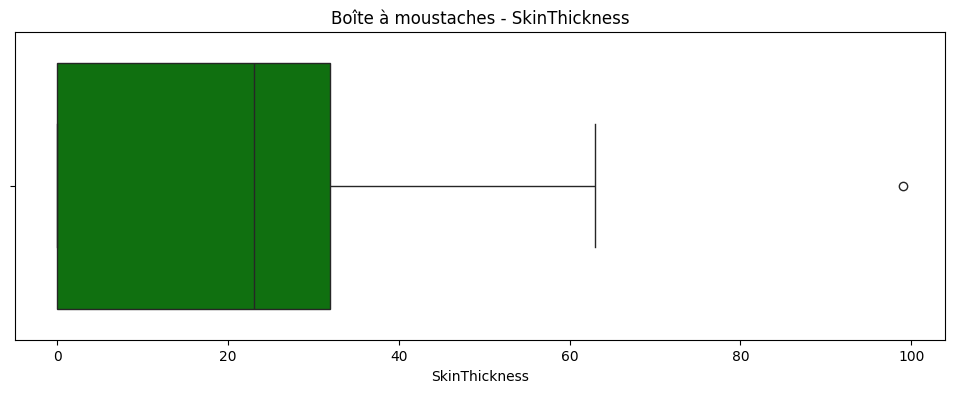

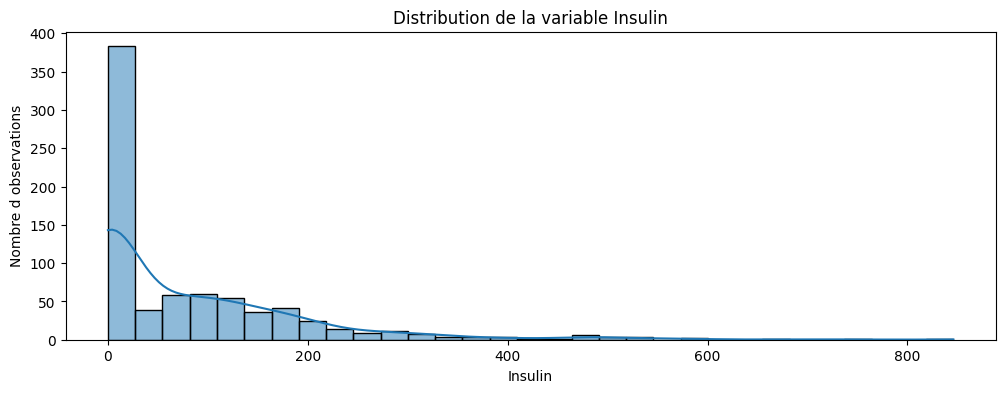

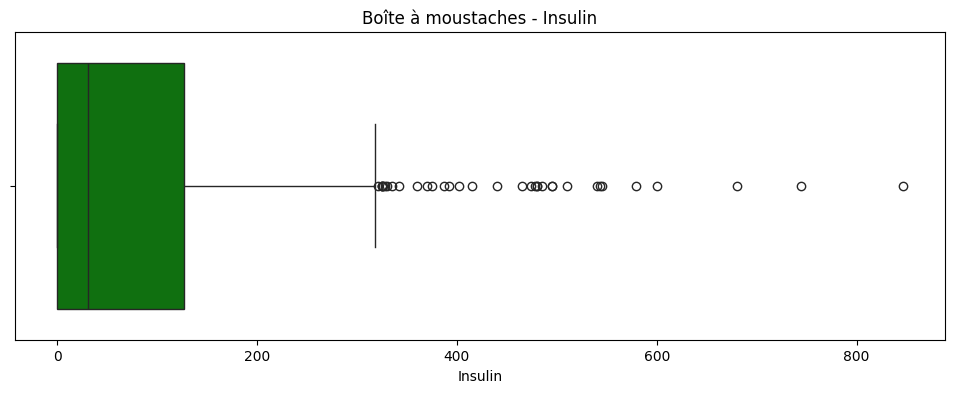

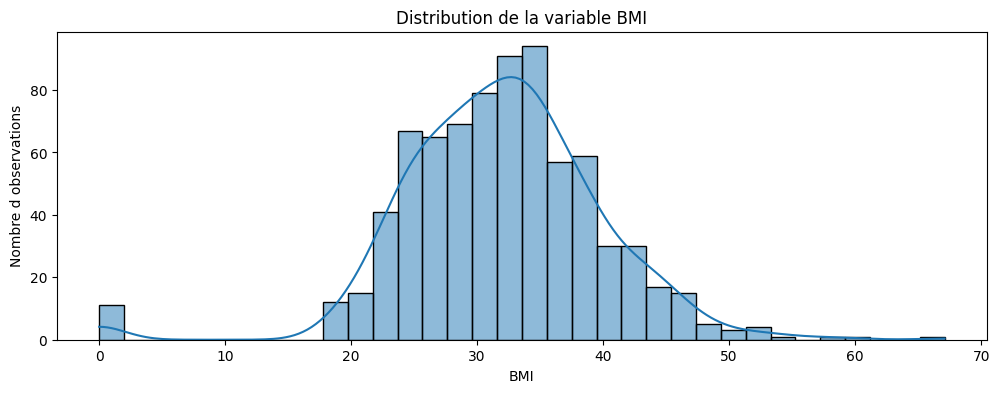

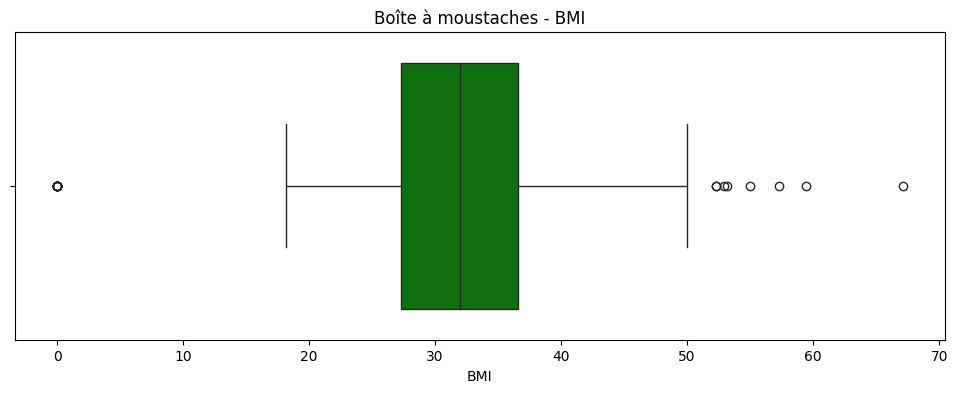

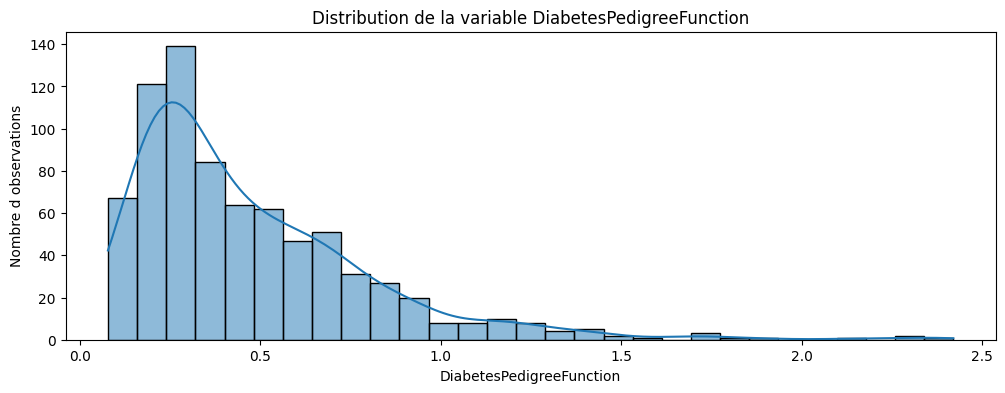

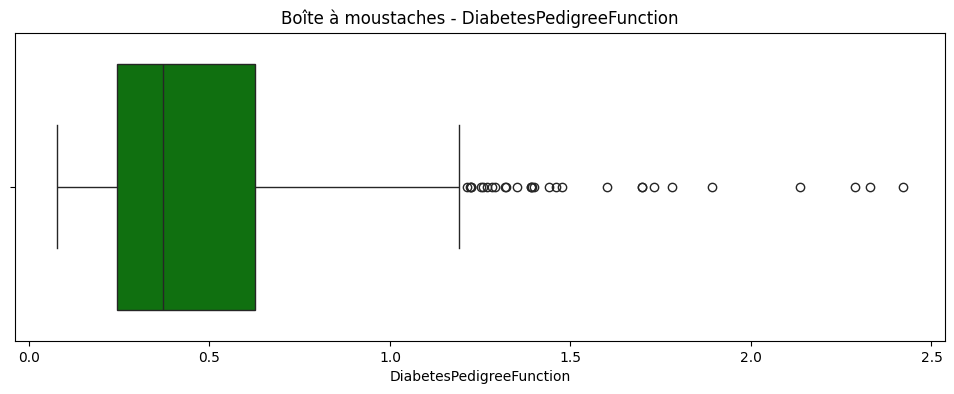

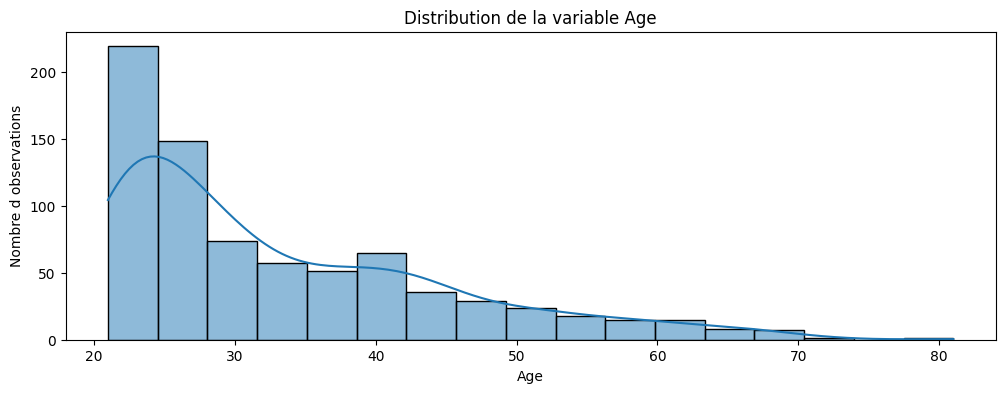

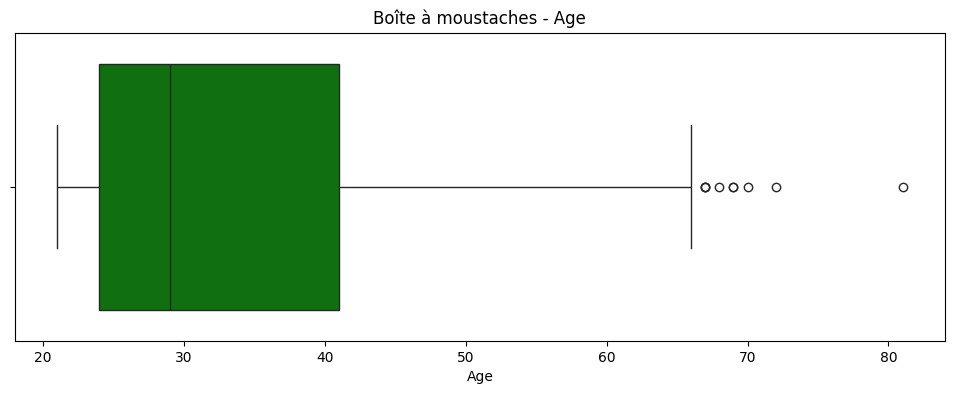

In [143]:
#Histogrammes, boxplots(seaborn, matplotlib)
for data in df:
    plt.figure(figsize=(12, 4))
    #trace un histogramme
    sns.histplot(df[data], kde=True)
    plt.title(f'Distribution de la variable {data}')
    plt.xlabel(data)
    plt.ylabel('Nombre d observations')
    #trace Boxplots
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[data], color='green')
    plt.title(f'Boîte à moustaches - {data}')

    

<Figure size 1200x800 with 0 Axes>

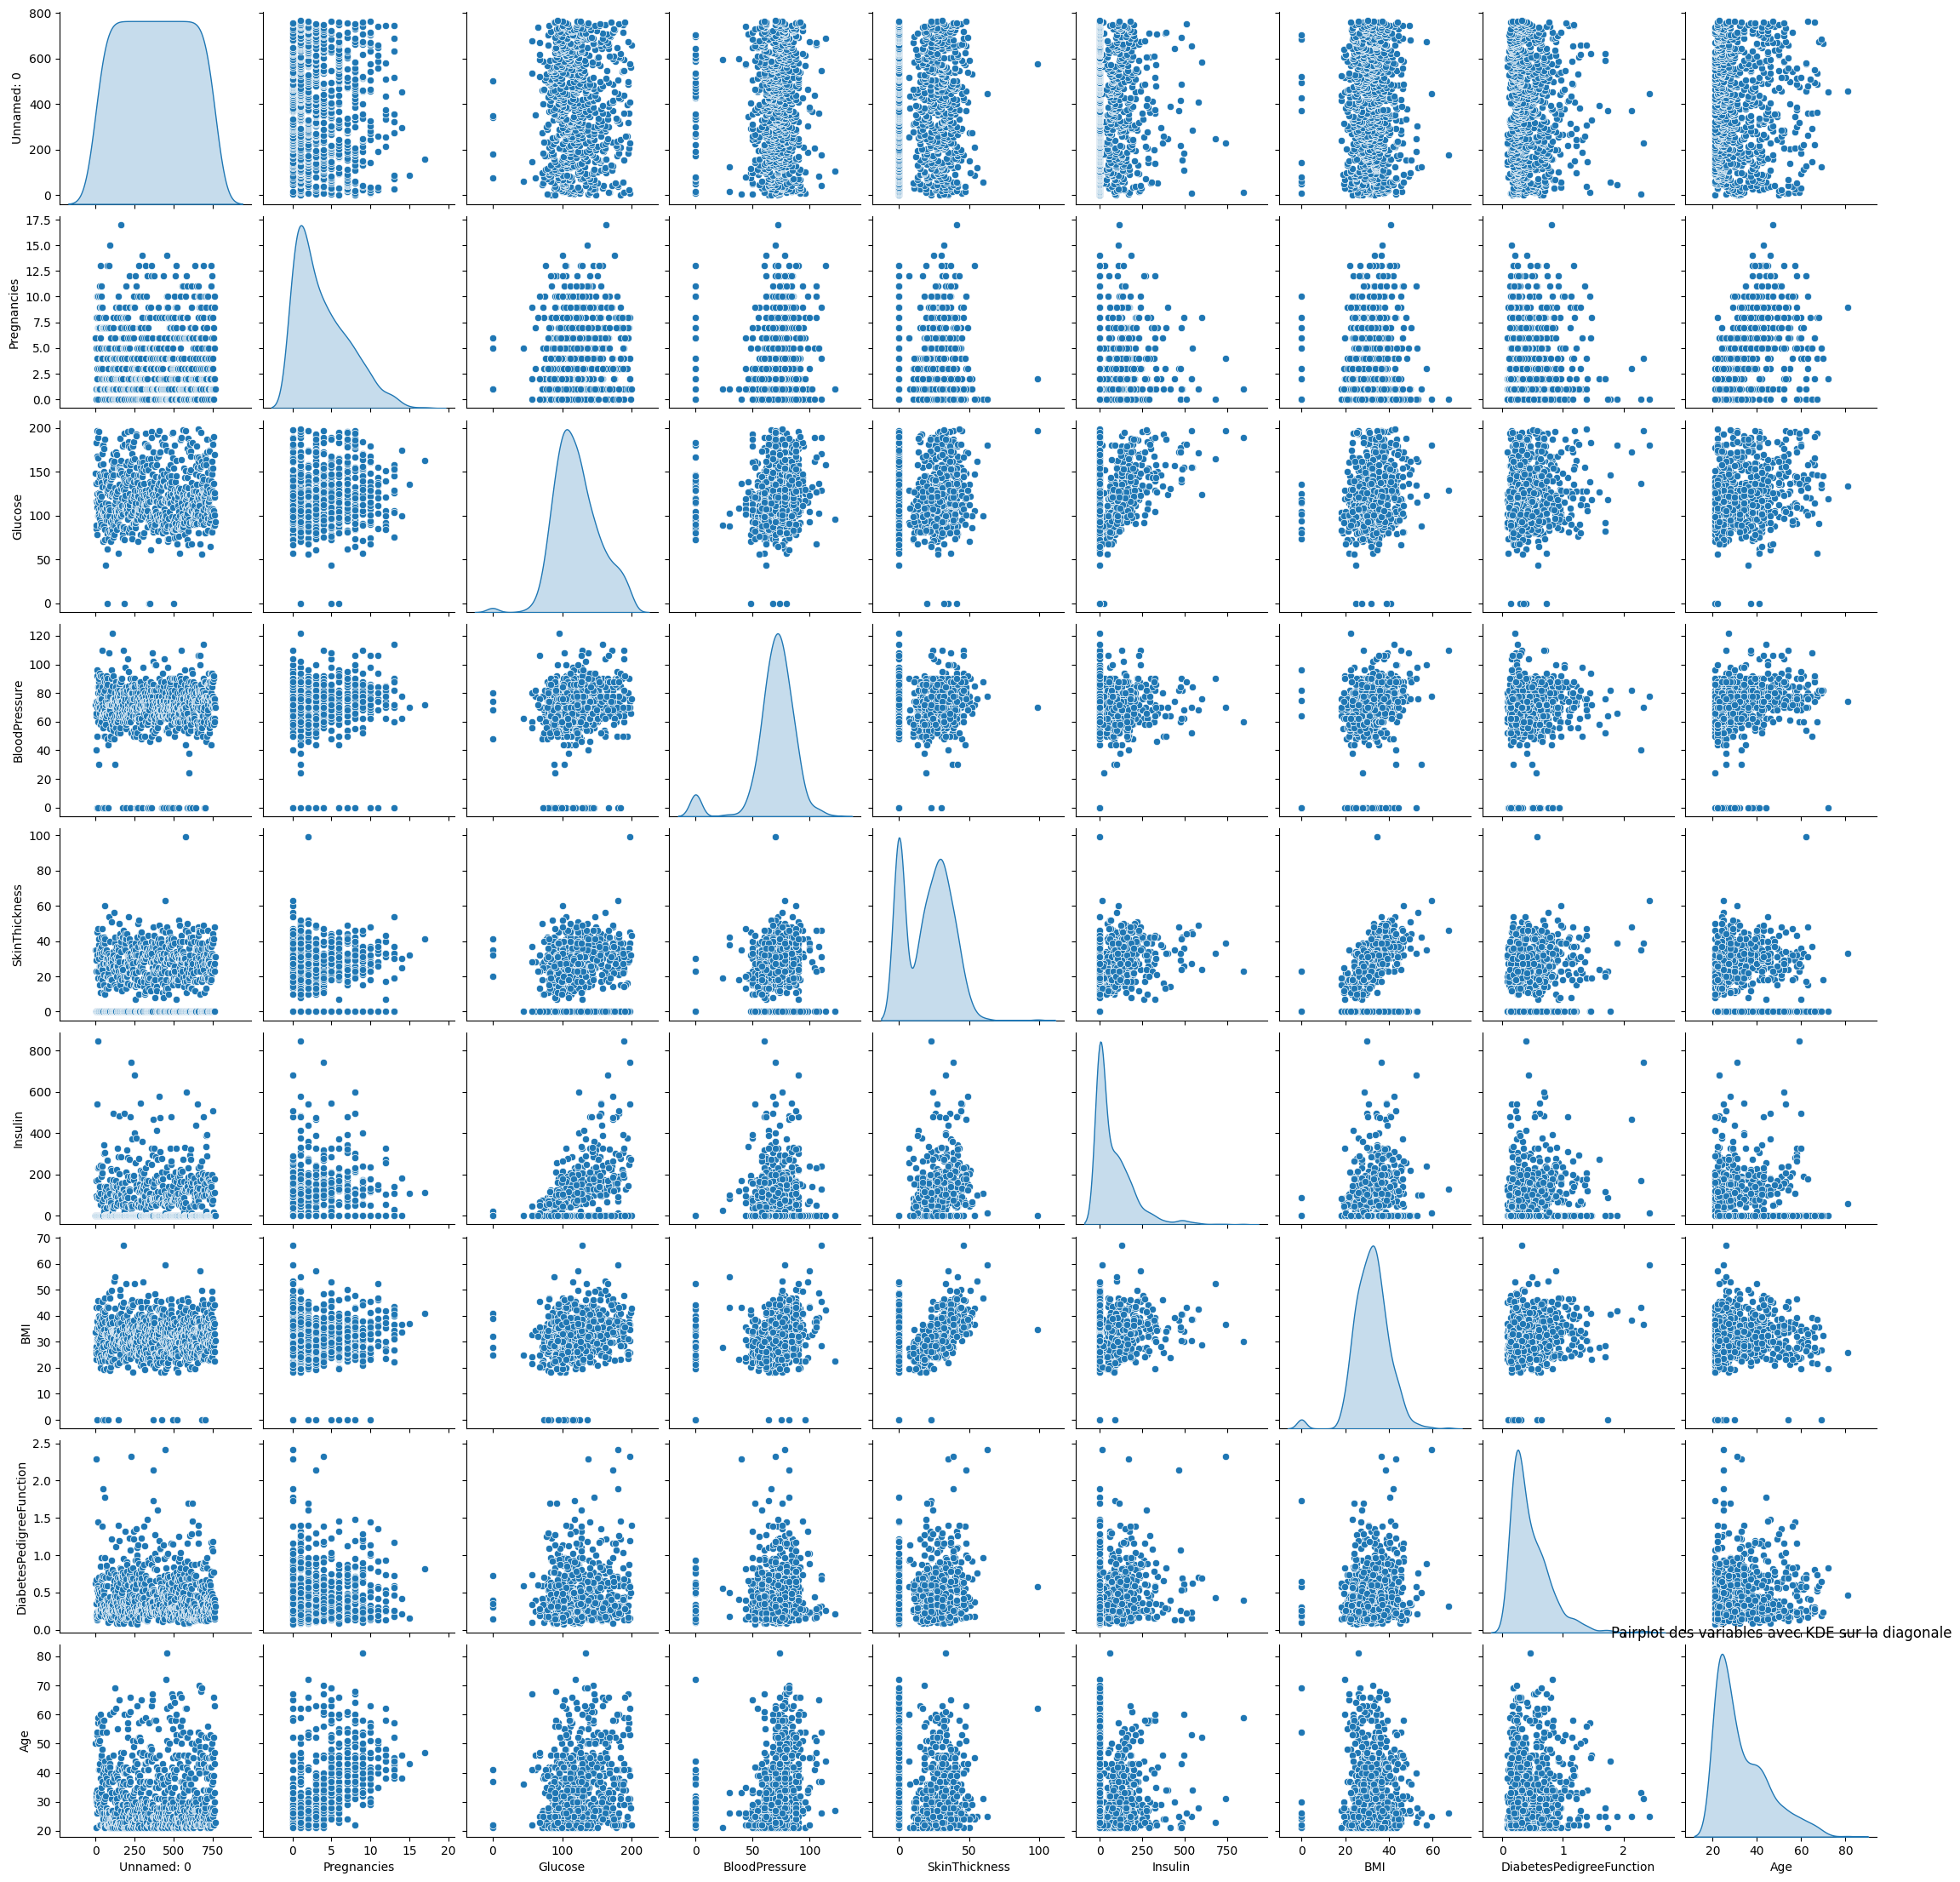

In [144]:
# Pairplots
plt.figure(figsize=(12, 8))
sns.pairplot(df, diag_kind='kde')
plt.title('Pairplot des variables avec KDE sur la diagonale')
plt.show()

## Matrice de corrélation 

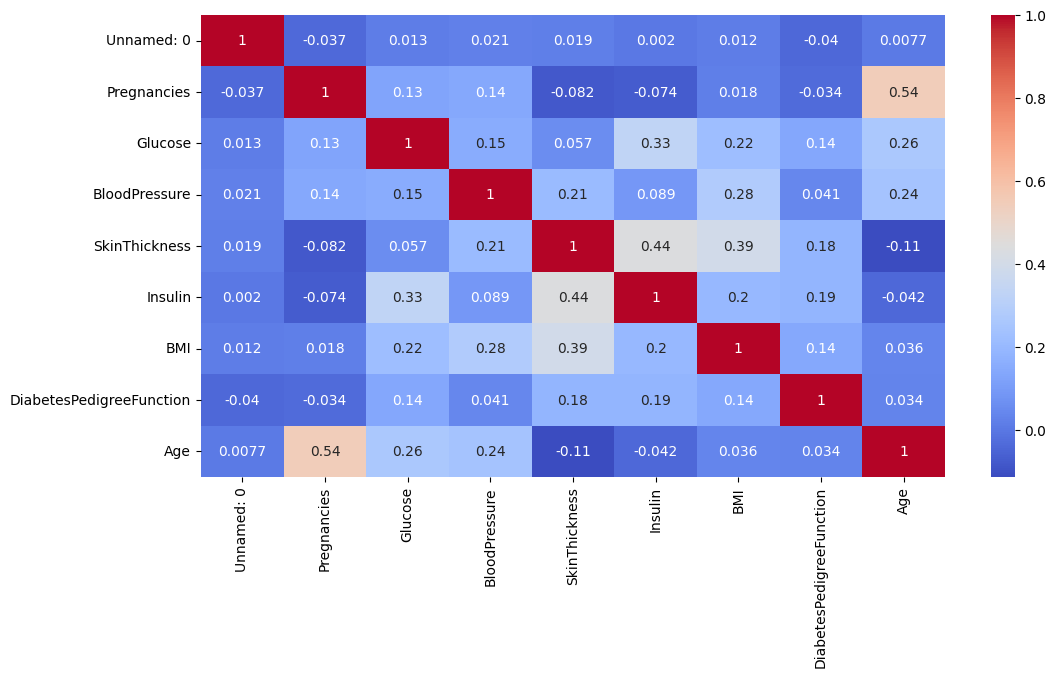

In [145]:
#Matrice de corrélation (sns.heatmap())
#les valeur entre -1 et 1
corr_matrix = df.corr()

# Visualisation : heatmap de corrélation
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Identifier les colonnes avec valeurs nulles

In [146]:
print('les colonnes avec les values manquantes sont :')
print(df.isnull().sum())

les colonnes avec les values manquantes sont :
Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


Appliquer une stratégie d’imputation (moyenne/médiane ou suppression)

In [147]:
print('pas des values manquantes dans le dataset donc on ne peut bas le changement des values manquantes')

pas des values manquantes dans le dataset donc on ne peut bas le changement des values manquantes


Détection des doublons

In [148]:
print("\nNombre de doublons :")
print(df.duplicated().sum())


Nombre de doublons :
0


Visualisation des outliers (IQR)

In [149]:
# Détection des valeurs extrêmes pour la colonne 'price'
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    borne_min = q1 - 1.5 * iqr
    borne_max = q3 + 1.5 * iqr
    outliers = df[(df[col] < borne_min) | (df[col] > borne_max)]
    print(f"Colonne : {col}, Nombre d'outliers : {len(outliers)}")

Colonne : Unnamed: 0, Nombre d'outliers : 0
Colonne : Pregnancies, Nombre d'outliers : 4
Colonne : Glucose, Nombre d'outliers : 5
Colonne : BloodPressure, Nombre d'outliers : 45
Colonne : SkinThickness, Nombre d'outliers : 1
Colonne : Insulin, Nombre d'outliers : 34
Colonne : BMI, Nombre d'outliers : 19
Colonne : DiabetesPedigreeFunction, Nombre d'outliers : 29
Colonne : Age, Nombre d'outliers : 9


Supprimer les outliers

In [150]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:  
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    min_val = q1 - 1.5 * iqr
    max_val = q3 + 1.5 * iqr
    df = df[(df[col] >= min_val) & (df[col] <= max_val)]
    print(f'Outliers supprimés pour {col}')

Outliers supprimés pour Pregnancies
Outliers supprimés pour Glucose
Outliers supprimés pour BloodPressure
Outliers supprimés pour SkinThickness
Outliers supprimés pour Insulin
Outliers supprimés pour BMI
Outliers supprimés pour DiabetesPedigreeFunction
Outliers supprimés pour Age
